In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("digital_marketing.csv")

In [19]:
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [15]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

for col in ['Age', 'Income']:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)
    
for col in ['Gender', 'CampaignChannel', 'CampaignType']:
    data[col] = data[col].astype(str)  
    data[col] = data[col].replace('nan', 'Unknown')  
    data[col] = data[col].fillna('Unknown') 
    
for col in ['Gender', 'CampaignChannel', 'CampaignType']:
    data[col] = data[col].astype('category')
    
numeric_cols = ['AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 
                'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 
                'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [16]:
data = data.dropna(subset=['Conversion'])

In [18]:
duckdb.sql("DROP TABLE IF EXISTS marketing;")
duckdb.sql("CREATE TABLE marketing AS SELECT * FROM data;")
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [20]:
channel_conv = duckdb.sql("""
    SELECT CampaignChannel, 
           COUNT(*) AS total_customers,
           SUM(Conversion) AS converted,
           ROUND(AVG(Conversion),3) AS conversion_rate
    FROM marketing
    GROUP BY CampaignChannel
    ORDER BY conversion_rate DESC
""").df()
channel_conv

,CampaignChannel,total_customers,converted,conversion_rate
0,PPC,1655,1461.0,0.883
1,Referral,1719,1518.0,0.883
2,SEO,1550,1359.0,0.877
3,Email,1557,1355.0,0.870
4,Social Media,1519,1319.0,0.868


In [21]:
type_conv = duckdb.sql("""
    SELECT CampaignType,
           COUNT(*) AS total_customers,
           SUM(Conversion) AS converted,
           ROUND(AVG(Conversion),3) AS conversion_rate
    FROM marketing
    GROUP BY CampaignType
    ORDER BY conversion_rate DESC
""").df()
type_conv

,CampaignType,total_customers,converted,conversion_rate
0,Conversion,2077,1939.0,0.934
1,Retention,1947,1671.0,0.858
2,Awareness,1988,1701.0,0.856
3,Consideration,1988,1701.0,0.856


In [23]:
engagement = duckdb.sql("""
    SELECT Conversion,
           ROUND(AVG(SocialShares),2) AS avg_social_shares,
           ROUND(AVG(WebsiteVisits),2) AS avg_website_visits,
           ROUND(AVG(TimeOnSite),2) AS avg_time_on_site,
           ROUND(AVG(EmailOpens),2) AS avg_email_opens,
           ROUND(AVG(EmailClicks),2) AS avg_email_clicks,
           ROUND(AVG(PreviousPurchases),2) AS avg_previous_purchases,
           ROUND(AVG(LoyaltyPoints),2) AS avg_loyalty_points
    FROM marketing
    GROUP BY Conversion
""").df()
engagement

,Conversion,avg_social_shares,avg_website_visits,avg_time_on_site,avg_email_opens,avg_email_clicks,avg_previous_purchases,avg_loyalty_points
0,0,50.68,21.73,6.27,7.58,3.48,3.63,2128.48
1,1,49.68,25.18,7.93,9.74,4.61,4.61,2541.24


In [25]:
demographics = duckdb.sql("""
    SELECT Conversion,
           ROUND(AVG(Age),1) AS avg_age,
           ROUND(AVG(Income),2) AS avg_income
    FROM marketing
    GROUP BY Conversion
""").df()
demographics

,Conversion,avg_age,avg_income
0,0,43.6,83265.31
1,1,43.6,84861.30


/var/folders/rd/n19jdt9x1lgb3w20fckdfv6h0000gn/T/ipykernel_5040/884799941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_conv, x='CampaignChannel', y='conversion_rate', palette='viridis')


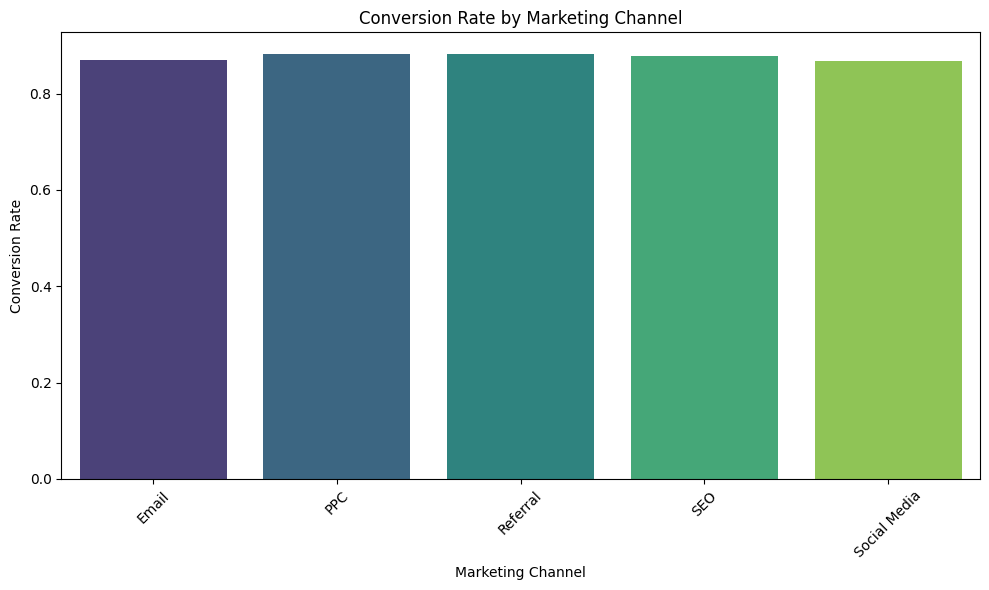

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=channel_conv, x='CampaignChannel', y='conversion_rate', palette='viridis')
plt.title("Conversion Rate by Marketing Channel")
plt.ylabel("Conversion Rate")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

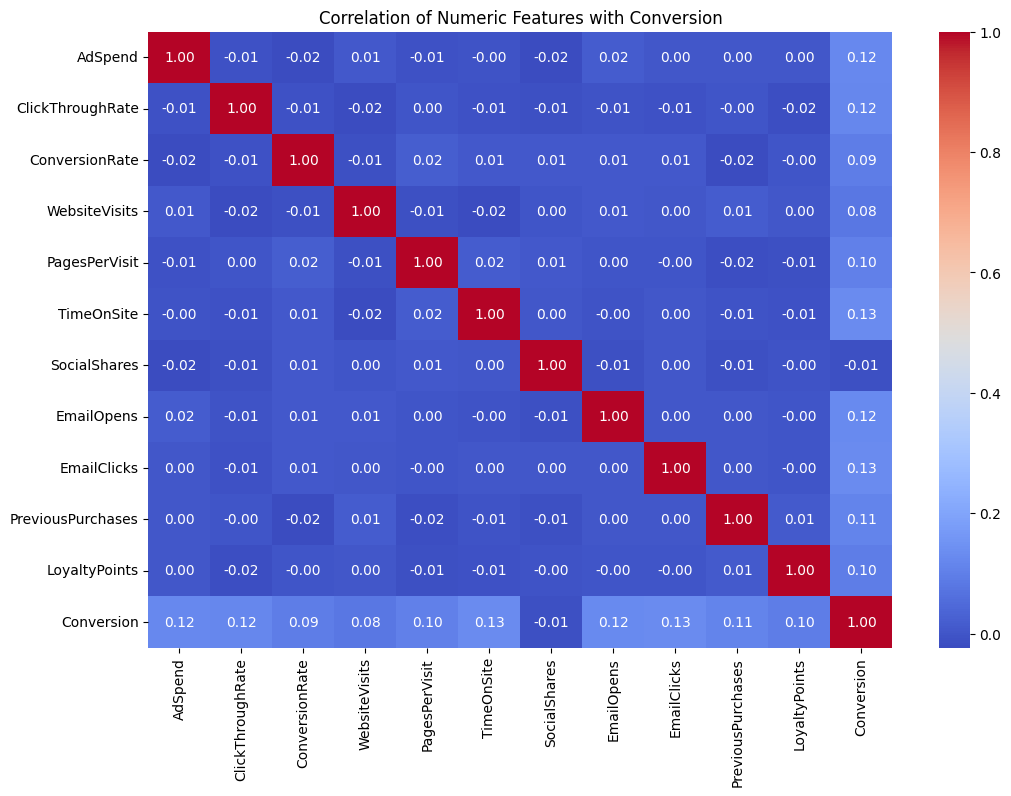

In [30]:
plt.figure(figsize=(12,8))
corr = data[numeric_cols + ['Conversion']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of Numeric Features with Conversion")
plt.show()

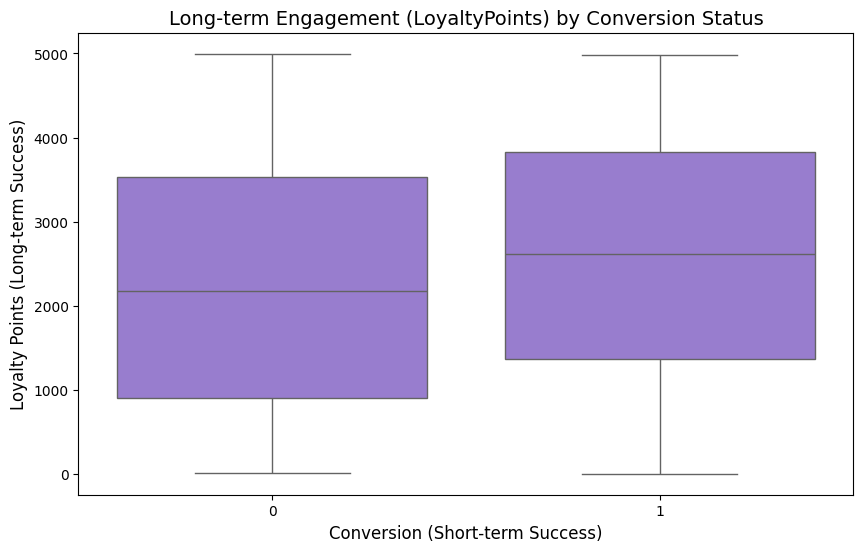

In [56]:
social_data = data[data['CampaignChannel'] == 'Social Media'].copy()
social_data['RetentionScore'] = social_data['LoyaltyPoints'] / (social_data['PreviousPurchases'] + 1)
plt.figure(figsize=(10,6))
sns.boxplot(data=social_data, x='Conversion', y='LoyaltyPoints', color='mediumpurple')  # nice purple
plt.title("Long-term Engagement (LoyaltyPoints) by Conversion Status", fontsize=14)
plt.xlabel("Conversion (Short-term Success)", fontsize=12)
plt.ylabel("Loyalty Points (Long-term Success)", fontsize=12)
plt.show()


/var/folders/rd/n19jdt9x1lgb3w20fckdfv6h0000gn/T/ipykernel_5040/304960937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_counts, x='Conversion', y='Count', palette='Set2')


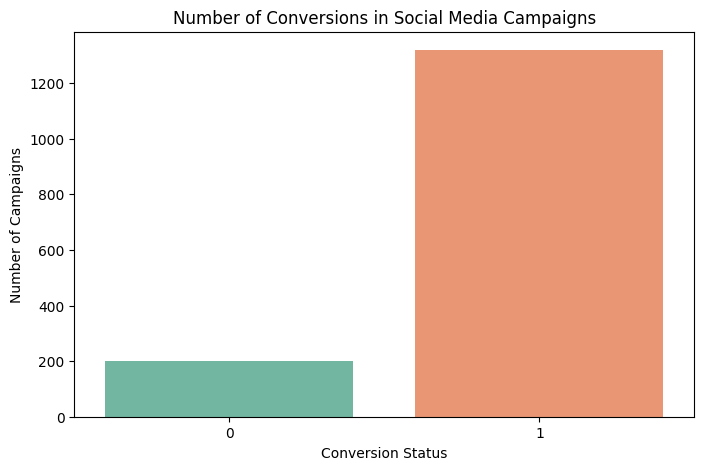

In [51]:
conversion_counts = social_data['Conversion'].value_counts().reset_index()
conversion_counts.columns = ['Conversion', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(data=conversion_counts, x='Conversion', y='Count', palette='Set2')
plt.title("Number of Conversions in Social Media Campaigns")
plt.xlabel("Conversion Status")
plt.ylabel("Number of Campaigns")
plt.show()

Boxplot: The boxplot of loyalty points by conversion status, shows that campaigns with a conversion status of 1 generally have higher loyalty points than those with a status of 0. This reveals that customers who respond positively to social media campaigns are more likely to make repeat purchases, indicating sustained success for small business.
Bar chart: It reveals that a much larger number of campaigns achieve conversion status 1 compared to 0. This proves the effectiveness of social media in driving campaign success, demonstrating its usefulness in marketing and advertisement efforts. 
However, when examining conversion rate by marketing channel, we see that different channels have similar conversion rates. 
While social media does not dominate in terms of conversion rate compared to other channels, it still plays a significant role by generating a substantial number of successful campaigns.